In [1]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [2]:
%run graficarVectores.ipynb
%run graficarMatriz.ipynb

# Descomposición con vectores y valores característicos

Sea $A \in M_{n}$, podemos escribir ($v_i$ es un vector columna)

$$
A = \begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}
\begin{bmatrix}
    \lambda_1 & 0         & 0      & 0\\
    0         & \lambda_2 & 0      & 0\\
    0         & 0         & \ddots & 0\\
    0         & 0         & 0      & \lambda_n
\end{bmatrix}
\begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}^{-1}\\
A = V \Lambda V^{-1}
$$

Donde $v_i$ es un autovector de $A$, y $\lambda_i$ es un autovalor.

**Demostración**

Sea
$$
V = \begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}\\
$$

$V$ contiene a los vectores característicos de $A$.

$$
AV = 
A \begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix} =
\begin{bmatrix}
    A v_1 & A v_2 & \dots & A v_n
\end{bmatrix}
$$

Como $v_i$ es vector característico se cumple que $A v_i = \lambda_i v_i$, entonces

$$
AV = 
\begin{bmatrix}
    A v_1 & A v_2 & \dots & A v_n
\end{bmatrix} =
\begin{bmatrix}
    \lambda_1 v_1 & \lambda_2 v_2 & \dots & \lambda_n v_n
\end{bmatrix} = 
\begin{bmatrix}
    v_1 & v_2 & \dots &  v_n
\end{bmatrix} \begin{bmatrix}
    \lambda_1 & 0         & 0      & 0\\
    0         & \lambda_2 & 0      & 0\\
    0         & 0         & \ddots & 0\\
    0         & 0         & 0      & \lambda_n
\end{bmatrix}
$$

$$
AVV^{-1} = 
\begin{bmatrix}
    v_1 & v_2 & \dots &  v_n
\end{bmatrix} \begin{bmatrix}
    \lambda_1 & 0         & 0      & 0\\
    0         & \lambda_2 & 0      & 0\\
    0         & 0         & \ddots & 0\\
    0         & 0         & 0      & \lambda_n
\end{bmatrix} V^{-1}\\
A = V \Lambda V^{-1}
$$

q.e.d.

Otra forma:

$$
A = \begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}
\begin{bmatrix}
    \lambda_1 & 0         & 0      & 0\\
    0         & \lambda_2 & 0      & 0\\
    0         & 0         & \ddots & 0\\
    0         & 0         & 0      & \lambda_n
\end{bmatrix}
\begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}^{-1} =
\begin{bmatrix}
    \lambda_1 v_1 & \lambda_2 v_2 & \dots & \lambda_n v_n
\end{bmatrix}
\begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}^{-1} = 
\begin{bmatrix}
    A v_1 & A v_2 & \dots & A v_n
\end{bmatrix}
\begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}^{-1} =
A \begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}
\begin{bmatrix}
    v_1 & v_2 & \dots & v_n
\end{bmatrix}^{-1} = 
A V V^{-1} = A
$$

q.e.d.

**Aplicaciones**

$$
\begin{split}
A^n &= (V \Lambda V^{-1})^n\\
&= (V \Lambda V^{-1}) (V \Lambda V^{-1}) (V \Lambda V^{-1}) (V \Lambda V^{-1}) \dots\\
&= V \Lambda V^{-1} V \Lambda V^{-1} V \Lambda V^{-1} V \Lambda V^{-1} \dots\\
&= V \Lambda I \Lambda I \Lambda I \Lambda V^{-1} \dots\\
&= V \Lambda^n V^{-1}
\end{split}
$$

Si $A = A^T$, entonces $A^n = V \Lambda^n V^T$

Cálculo de la serie de Fibonnacci https://brilliant.org/wiki/matrix-diagonalization/

https://dkatz.ku.edu/Math%20290/M290_Lecture13h.pdf

### Código

In [3]:
A = np.array([
    [3, 2],
    [4, 1]
])

eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvalues)
print(eigenvectors)
print(eigenvectors[:, 0] @ eigenvectors[:, 1]) # corroborando que los eigenvectores sean ortogonales

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]
0.3162277660168379


In [4]:
# usando A = V L V^-1
V = eigenvectors
L = np.diag(eigenvalues)
print(V.dot(L).dot(np.linalg.inv(V)))

[[3. 2.]
 [4. 1.]]


### A mano

$$
A = \begin{bmatrix}
3 & 2\\
4 & 1
\end{bmatrix}
$$

Buscamos un $\textbf{x}$ tal que $A\textbf{x} = \lambda \textbf{x}\ \forall \lambda \in R$

($\textbf{x}$ es el vector característico, $\lambda$ es el valor característico)

$$
A\textbf{x} = \lambda \textbf{x}\\
A\textbf{x} - \lambda \textbf{x} = \textbf{0}\\
(A - \lambda)\textbf{x} = \textbf{0}\\
(A - \lambda I)\textbf{x} = \textbf{0}\\
$$

Para que el sistema no tenga únicamente la solución trivial se require que $|A - \lambda I| = 0$ ([explicación](https://math.stackexchange.com/questions/2288308/why-non-trivial-solution-only-if-determinant-is-zero)) porque si $|A - \lambda I| \neq 0$ entonces la inversa existe, y $\textbf{x} = (A - \lambda I)^{-1} \textbf{0} = \textbf{0}$, i.e. solo existe la solución trivial. Así

$$
\begin{split}
\begin{vmatrix}
\begin{bmatrix}
3 & 2\\
4 & 1
\end{bmatrix} - \begin{bmatrix}
\lambda & 0\\
0         & \lambda
\end{bmatrix}
\end{vmatrix} &= 0\\
\begin{vmatrix}
3 - \lambda & 2\\
4           & 1 - \lambda
\end{vmatrix} &= 0\\
(3 - \lambda)(1 - \lambda) - 8 &= 0\\
3 - 4\lambda + \lambda^2 - 8 &= 0\\
\lambda^2 - 4\lambda - 5 &= 0\\
(\lambda - 5)(\lambda + 1) &= 0 \implies \lambda = \{5, -1\}
\end{split}
$$

Para hallar los vectores característicos:

1. Con $\lambda = 5$
$$
\begin{split}
A \textbf{x} &= 5 \textbf{x}
\\
\begin{bmatrix}
3 & 2\\
4 & 1
\end{bmatrix} 
\begin{bmatrix}
a\\
b
\end{bmatrix} &= 5 \begin{bmatrix}
a\\
b
\end{bmatrix}
\\
\begin{bmatrix}
3 a + 2 b\\
4 a + 1 b
\end{bmatrix} &= \begin{bmatrix}
5 a\\
5 b
\end{bmatrix}
\end{split}
$$

Resolviendo se tiene que $a = b$, por lo tanto un vector característico tiene la forma
$$
\begin{bmatrix}
t\\
t
\end{bmatrix} \forall t \in R
$$

Si queremos un vector unitario:
$$
\begin{split}
||\textbf{x}|| &= 1\\
\sqrt{<x, x>} &= 1\\
\sqrt{x \cdot x} &= 1\\
\sqrt{x^T x} &= 1\\
\sqrt{
\begin{bmatrix}
t & t
\end{bmatrix} \begin{bmatrix}
t\\
t
\end{bmatrix}} &= 1\\
\sqrt{t^2 + t^2} &= 1\\
\sqrt{2t^2} &= 1\\
t\sqrt{2} &= 1\\
t &= \frac{1}{\sqrt{2}} \approx 0.70710678
\end{split}
$$

Y

$$
\hat{\textbf{x}} = \begin{bmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

2. Con $\lambda = -1$
$$
\begin{split}
\begin{bmatrix}
3 a + 2 b\\
4 a + 1 b
\end{bmatrix} &= \begin{bmatrix}
-1 a\\
-1 b
\end{bmatrix}
\end{split}
$$

Resolviendo se tiene que $b = -2a$, por lo tanto un vector característico tiene la forma
$$
\begin{bmatrix}
t\\
-2t
\end{bmatrix} \forall t \in R
$$

Si queremos un vector unitario:
$$
\begin{split}
||\textbf{x}|| &= 1\\
\sqrt{t^2 + 4t^2} &= 1\\
t &= \frac{1}{\sqrt{5}} \approx 0.4472135955
\end{split}
$$

Y

$$
\hat{\textbf{x}} = \begin{bmatrix}
\frac{1}{\sqrt{5}}\\
-\frac{2}{\sqrt{5}}
\end{bmatrix}
$$

(para este caso, numpy sacó $-\hat{\textbf{x}}$, pero eso no importa porque ambos tienen la misma forma característica)

Entonces, calculados a mano, los valores, y vectores unitarios característicos son:

$$
\lambda_1 = 5, \lambda_2 = -1, \hat{\textbf{x}}_1 = \begin{bmatrix}
\frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}}
\end{bmatrix}, \hat{\textbf{x}}_2 = \begin{bmatrix}
\frac{1}{\sqrt{5}}\\
-\frac{2}{\sqrt{5}}
\end{bmatrix}
$$

Así

$$
V = \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{5}}\\
\frac{1}{\sqrt{2}} & -\frac{2}{\sqrt{5}}
\end{bmatrix}
$$

$$
V^{-1} = \frac{1}{-\frac{2}{\sqrt{10}} - \frac{1}{\sqrt{10}}}\begin{bmatrix}
-\frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{2}}\\
-\frac{1}{\sqrt{5}} & \frac{1}{\sqrt{2}}
\end{bmatrix}^T = -\frac{\sqrt{10}}{3}\begin{bmatrix}
-\frac{2}{\sqrt{5}} & -\frac{1}{\sqrt{5}}\\
-\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{bmatrix} = \frac{1}{3}\begin{bmatrix}
2\sqrt{2} & \sqrt{2}\\
\sqrt{5}  & -\sqrt{5}
\end{bmatrix}
$$

Luego podemos descomponer a $A$ como sigue:

$$
\begin{split}
A &= V \Lambda V^{-1}\\
&= \begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{5}}\\
\frac{1}{\sqrt{2}} & -\frac{2}{\sqrt{5}}
\end{bmatrix} \begin{bmatrix}
5 & 0\\
0 & -1
\end{bmatrix} \left( \frac{1}{3}\begin{bmatrix}
2\sqrt{2} & \sqrt{2}\\
\sqrt{5}  & -\sqrt{5}
\end{bmatrix} \right)\\
&= \frac{1}{3} \begin{bmatrix}
\frac{5}{\sqrt{2}} & -\frac{1}{\sqrt{5}}\\
\frac{5}{\sqrt{2}} & \frac{2}{\sqrt{5}}
\end{bmatrix}\begin{bmatrix}
2\sqrt{2} & \sqrt{2}\\
\sqrt{5}  & -\sqrt{5}
\end{bmatrix}\\
&= \frac{1}{3} \begin{bmatrix}
9  & 6\\
12 & 3
\end{bmatrix}\\
&= \begin{bmatrix}
3 & 2\\
4 & 1
\end{bmatrix}
\end{split}
$$

Magia! Qué bonita es la matemática

¿Qué pasa si $V$ no tiene vectores unitarios únicamente?

$$
V = \begin{bmatrix}
t & l\\
t & -2l
\end{bmatrix}
$$

$$
V^{-1} = \frac{1}{-2tl - tl}\begin{bmatrix}
-2l & -t\\
-l  & t
\end{bmatrix}^T = -\frac{1}{3tl}\begin{bmatrix}
-2l & -l\\
-t  & t
\end{bmatrix} = \frac{1}{3tl}\begin{bmatrix}
2l & l\\
t  & -t
\end{bmatrix}
$$

Luego podemos descomponer a $A$ como sigue:

$$
\begin{split}
A &= V \Lambda V^{-1}\\
&= \begin{bmatrix}
t & l\\
t & -2l
\end{bmatrix} \begin{bmatrix}
5 & 0\\
0 & -1
\end{bmatrix} \left( \frac{1}{3tl}\begin{bmatrix}
2l & l\\
t  & -t
\end{bmatrix} \right)\\
&= \frac{1}{3tl} \begin{bmatrix}
5t & -l\\
5t & 2l
\end{bmatrix}\begin{bmatrix}
2l & l\\
t  & -t
\end{bmatrix}\\
&= \frac{1}{3tl} \begin{bmatrix}
9tl  & 6tl\\
12tl & 3tl
\end{bmatrix}\\
&= \begin{bmatrix}
3 & 2\\
4 & 1
\end{bmatrix}
\end{split}
$$

No pasa nada, tenemos el mismo resultado

## Si $A$ es simétrica

Si $A$ es simétrica, i.e. $A = A^T \implies V^{-1} = V^T$, y entonces podemos escribir

$$A = V \Lambda V^{-1} = V \Lambda V ^ T$$

**Demostración**
https://medium.com/sho-jp/linear-algebra-101-part-7-eigendecomposition-when-symmetric-4cd41d38269e

PD 1: Los vectores característicos son ortogonales. i.e. $A = A^T \implies <v_i, v_j> = 0\ \forall i \neq j$

PD 2: Si los vectores característicos son ortonormales, entonces $V^{-1} = V^T$.

1.

$$
\begin{split}
\lambda_i <v_i, v_j> &= <\lambda_i v_i, v_j>\\
&= <A v_i, v_j>\\
&= (A v_i)^T v_j\\
&= v_i^T A^T v_j\\
&= v_i^T A v_j\\
&= <v_i, A v_j>\\
&= <v_i, \lambda_j v_j>\\
&= \lambda_j <v_i, v_j>
\end{split}
$$

Para que lo anterior sea cierto $\lambda_i = \lambda_j$, o bien $<v_i, v_j> = 0$, por lo tanto, si $i \neq j$, entonces $<v_i, v_j> = 0$.

2.

$$
\begin{split}
V V^{-1} = I = V V^T = I^T = (V V^T)^T &= V^T V
\\
&= \begin{bmatrix}
v_1\\
v_2\\
\vdots\\
v_n
\end{bmatrix} 
\begin{bmatrix}
v_1 & v_2 & \dots & v_n
\end{bmatrix}
\\
&= \begin{bmatrix}
<v_1, v_1> & <v_1, v_2> & \dots  & <v_1, v_n>\\
<v_2, v_1> & <v_2, v_2> & \dots  & <v_2, v_n>\\
\vdots     & \vdots     & \ddots & \vdots\\
<v_n, v_1> & <v_n, v_2> & \dots  & <v_n, v_n>
\end{bmatrix}
\\
&= \begin{bmatrix}
1      & 0      & \dots  & 0\\
0      & 1      & \dots  & 0\\
\vdots & \vdots & \ddots & \vdots\\
0      & 0      & \dots  & 1
\end{bmatrix}
\\
&= I
\end{split}
$$

### Código

In [5]:
A = np.array([
    [3, 2],
    [2, 1]
])

eigenvalues, eigenvectors = np.linalg.eig(A)
#print(eigenvectors)

# usando A = V L V^-1
# como A es simétrica, A = V L V^T
V = eigenvectors
L = np.diag(eigenvalues)
print(V.dot(L).dot(V.T))
print(V.dot(L).dot(np.linalg.inv(V)))
# ambos resultados deben ser iguales
# Lo anterior no se mantiene si A no es simétrica

[[3. 2.]
 [2. 1.]]
[[3. 2.]
 [2. 1.]]


### A mano

$$
A = \begin{bmatrix}
3 & 2\\
2 & 1
\end{bmatrix}
$$

Valores característicos:
$$
\begin{vmatrix}
3 - \lambda & 2\\
2           & 1 - \lambda
\end{vmatrix} = (3 - \lambda)(1 - \lambda) - 4 = 3 - 4\lambda + \lambda^2 - 4 = \lambda^2 - 4\lambda - 1 = 0\\
\lambda = \{2 + \sqrt{5}, 2 - \sqrt{5}\}
$$

Vectores característicos:

1. Con $\lambda = 2 + \sqrt{5}$

$$
\begin{bmatrix}
3a + 2b\\
2a + b
\end{bmatrix} = \begin{bmatrix}
(2 + \sqrt{5})a\\
(2 + \sqrt{5})b
\end{bmatrix}
$$

Resolviendo:

$b = \frac{-1 + \sqrt{5}}{2}a = \frac{2}{1 + \sqrt{5}}a$

Vector característico:

$$
\begin{bmatrix}
t\\
\frac{-1 + \sqrt{5}}{2}t
\end{bmatrix} \forall t \in R
$$

Vector característico unitario:

$$
\sqrt{t^2 + \frac{3 - \sqrt{5}}{2}t^2} = 1 \implies t \approx 0.8506508084\\
\begin{bmatrix}
0.8506508084\\
0.5257311121
\end{bmatrix}
$$

2. Con $\lambda = 2 - \sqrt{5}$

$$
\begin{bmatrix}
3a + 2b\\
2a + b
\end{bmatrix} = \begin{bmatrix}
(2 - \sqrt{5})a\\
(2 - \sqrt{5})b
\end{bmatrix}
$$

Resolviendo:

$b = -\frac{1 + \sqrt{5}}{2}a = \frac{2}{1 - \sqrt{5}}a$

Vector característico:

$$
\begin{bmatrix}
t\\
-\frac{1 + \sqrt{5}}{2}t
\end{bmatrix} \forall t \in R
$$

Vector característico unitario:

$$
\sqrt{t^2 + \frac{3 + \sqrt{5}}{2}t^2} = 1 \implies t \approx 0.5257311121\\
\begin{bmatrix}
0.5257311121\\
-0.8506508084
\end{bmatrix}
$$

Luego

$$
V = \begin{bmatrix}
0.8506508084 & 0.5257311121\\
0.5257311121 & -0.8506508084
\end{bmatrix}
$$

$$
A = V \Lambda V^T\\
A = \begin{bmatrix}
0.8506508084 & 0.5257311121\\
0.5257311121 & -0.8506508084
\end{bmatrix} \begin{bmatrix}
2 + \sqrt{5} & 0\\
0            & 2 - \sqrt{5}
\end{bmatrix} \begin{bmatrix}
0.8506508084 & 0.5257311121\\
0.5257311121 & -0.8506508084
\end{bmatrix}
$$

# Singular Value Decomposition

MIT class
https://www.youtube.com/watch?v=Nx0lRBaXoz4

MIT class notes
https://math.mit.edu/classes/18.095/2016IAP/lec2/SVD_Notes.pdf

Other nice stuff
https://gregorygundersen.com/blog/2018/12/20/svd-proof/

https://gregorygundersen.com/blog/2018/12/10/svd/

Se trata de hallar una base ortonormal $\{v_1, v_2, \dots v_n\}$ en el espacio fila de $A$ tal que multiplicados por $A$ convierta esa base a una base en el espacio columna de $A$.

Es decir, si $v_i$ pertenece a la base en el espacio fila, entonces $A v_i = \sigma_i u_i$.

Donde $u_i$ pertenece a la base en el espacio columna de $A$.

$$
A \begin{bmatrix}v_1 & v_2 & \dots & v_n\end{bmatrix} = \begin{bmatrix}\sigma_1 u_1 & \sigma_2 u_2 & \dots & \sigma_n u_n\end{bmatrix}
= \begin{bmatrix}
u_1 & u_2 & \dots & u_n
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0        & 0      & 0\\
0        & \sigma_2 & 0      & 0\\
0        & 0        & \ddots & 0\\
0        & 0        & 0      & \sigma_n
\end{bmatrix}
= U \Sigma
$$

$$
A V = U \Sigma \implies A = U \Sigma V^{-1}
$$

Como $V$ es ortonormal $\implies V^{-1}=V^T$ (arriba está la demostración, también ver más abajo). Luego

$$
A = U \Sigma V^T
$$

Para hallar a $U$ y a $V$:

1. Hallar a $U$

$$
\begin{split}
A A^T &= (U \Sigma V^T) (U \Sigma V^T)^T\\
&= U \Sigma V^T V \Sigma^T U^T\\
&= U \Sigma V^{-1} V \Sigma U^T\\
&= U \Sigma^2 U^T\\
\end{split}
$$

$A A^T$ es cuadrada y nos encontramos en el primer caso (podemos calcular a $U$ mediante la diagonalización de $A A^T$)

2. Hallar a $V$

$$
\begin{split}
A^T A &= (U \Sigma V^T)^T (U \Sigma V^T)\\
&= V \Sigma^T U^T U \Sigma V^T\\
&= V \Sigma U^{-1} U \Sigma V^T\\
&= V \Sigma^2 V^T\\
\end{split}
$$

$A^T A$ es cuadrada y nos encontramos en el primer caso (podemos calcular a $V$ mediante la diagonalización de $A^T A$)

$A^T A$ y $A A^T$ son simétricas $\implies V^{-1}=V^T, U^{-1}=U^T$ (demostración está arriba) y también implica que $U$ y $V$ son ortogonales (demostración arriba. De hecho se requiere que sean ortonormales)

Demostración de que son simétricas:

$$
(A^T A)^T = A^T A^{T^T} = A^T A\\
(A A^T)^T = A^{T^T} A^T = A A^T
$$


### Código

In [6]:
A = np.array([
    [1, 2, 3],
    [3, 4, 5]
])

#### Cálculo de $U$

In [7]:
# A A^T = U D^2 U^T
eigvalsU, eigvects = np.linalg.eig(A.dot(A.T))
U = eigvects
print(U)

[[-0.88577931 -0.46410668]
 [ 0.46410668 -0.88577931]]


#### Cálculo de $V$

In [8]:
# A^T A = V D^2 V^T
eigvalsV, eigvects = np.linalg.eig(A.T.dot(A))
V = eigvects
print(V)
#VT = V.T
#VT = VT[[1, 0, 2], :]
#print(VT)

[[-0.39133557 -0.8247362   0.40824829]
 [-0.5605708  -0.13817999 -0.81649658]
 [-0.72980603  0.54837623  0.40824829]]


#### Cálculo de $\Sigma$

In [9]:
print(eigvalsU, eigvalsV)

[ 0.3772234 63.6227766] [6.36227766e+01 3.77223398e-01 1.16614561e-15]


**Nota**: Teóricamente los valores característicos deben ser los mismos, aquí los autovalores de $V$ tienen un pequeño error. En lugar de ser un número muy pequeño (`1.16614561e-15`) debería ser `0`. Para quitar esos defectos podemos filtrar `eigenvalues[eigenvalues > 1e-8]`

**Nota 2**: De hecho como la $\lambda$ que corresponde con el tercer autovector de $A^T A$ (tercer columna de $V$) es 0, eso indica que todos los múltiplos pertenecen al núcleo porque todos se reducen a $\textbf{0}$. Lo podemos comprobar si calculamos el núcleo de  $A^T A$

In [10]:
# Núcleo: todos los x tales que (A^T A)x = 0
A.T.dot(A)

array([[10, 14, 18],
       [14, 20, 26],
       [18, 26, 34]])

Su forma escalonada reducida es 
$$
\begin{bmatrix}
1 & 0 & -1 & 0\\
0 & 1 &  2 & 0\\
0 & 0 &  0 & 0
\end{bmatrix} \implies y + 2z = 0, x - z = 0 \implies y = -2z, x = z
$$

Parametrizando $z=t$, el núcleo es $N(A^T A) = \begin{bmatrix}
t\\
-2t\\
t
\end{bmatrix} \forall t \in R$. Y en efecto, el tercer autovector pertenece al núcleo. De hecho es el mismo núcleo que el de $A$

**Nota 3**: Nótese que los valores característicos están al revés (en `eigvalsU` y `eigvalsV`). Para que todo funcione correctamente $\sigma_i$ debe corresponder con $v_i$ y $u_i$, sino no va a jalar.

Si tomamos $\sigma_1^2 = 63.227766, \sigma_2^2 = 0.3772234$, entonces $u_1 = U[:, 1]$, $u_2 = U[:, 0]$

In [11]:
U = U[:, [1, 0]]
#U[:, 1] = -U[:, 1] # Si aquí hacemos este cambio las cuentas sí salen (ver abajo)

In [12]:
# U es 2x2
# V es 3x3
# D (Sigma) debe ser 2x3
D = np.sqrt(np.array([
    [eigvalsV[0], 0, 0],
    [0, eigvalsV[1], 0],
]))
print(U)
print(D)
print(V.T)
U.dot(D).dot(V.T)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
[[7.97638869 0.         0.        ]
 [0.         0.61418515 0.        ]]
[[-0.39133557 -0.5605708  -0.72980603]
 [-0.8247362  -0.13817999  0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


array([[1.8973666 , 2.15034881, 2.40333102],
       [2.52982213, 3.9212243 , 5.31262647]])

No salen las cuentas, y es nada más por un signo en el segundo vector (segunda columna) de $V$. (Comparar estos resultados con los de `np.linalg.svd` más abajo).

Teóricamente todo es correcto. No sé qué hice mal. Esta pregunta de SO es relativa a esto pero no es igual. https://math.stackexchange.com/questions/1805191/calculating-svd-by-hand-resolving-sign-ambiguities-in-the-range-vectors#2239200

**Es muy probable que al intercambiar las columnas se deba cambiar también el signo de alguna columna**

In [13]:
V[:, 1] = -V[:, 1]

In [14]:
U.dot(D).dot(V.T)

array([[1., 2., 3.],
       [3., 4., 5.]])

#### Usando `np.linalg.svd`

In [15]:
U, D, V = np.linalg.svd(A)
D = np.array([
    [D[0], 0, 0],
    [0, D[1], 0],
])
print(U)
print(D)
print(V)
U.dot(D).dot(V)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
[[7.97638869 0.         0.        ]
 [0.         0.61418515 0.        ]]
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


array([[1., 2., 3.],
       [3., 4., 5.]])

In [16]:
# Comprobando que U^-1 =U^T, V^-1 = V^T
print(U @ U.T)
print(V @ V.T)

[[1.00000000e+00 7.70334242e-17]
 [7.70334242e-17 1.00000000e+00]]
[[ 1.00000000e+00 -3.96595893e-17  2.81394425e-17]
 [-3.96595893e-17  1.00000000e+00 -1.29310856e-16]
 [ 2.81394425e-17 -1.29310856e-16  1.00000000e+00]]


## Interpretación

Primer rotación V


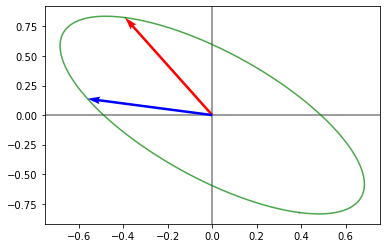

Escalamiento D. NÓTESE LOS LÍMITES, EN X ES MÁS (7.97 VECES MÁS), EN Y ES MENOS (0.61 VECES MENOS)


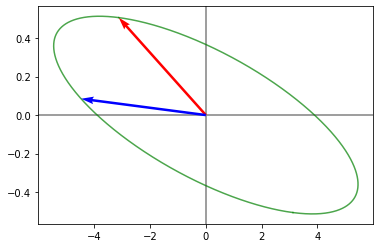

Segunda rotación U


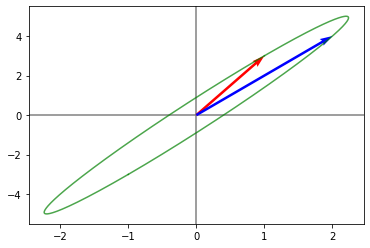

Transformación original A


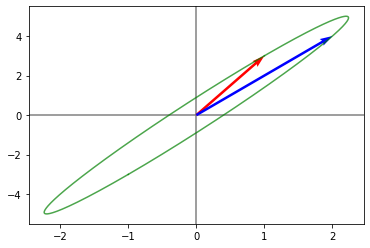

In [17]:
print("Primer rotación V")
graficarMatriz(V)
plt.show()

print("Escalamiento D. NÓTESE LOS LÍMITES, EN X ES MÁS (7.97 VECES MÁS), EN Y ES MENOS (0.61 VECES MENOS)")
graficarMatriz(D @ V)
plt.show()

print("Segunda rotación U")
graficarMatriz(U @ D @ V)
plt.show()

print("Transformación original A")
graficarMatriz(A)